In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preparation

In [2]:
df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="NewCustomerList")

In [3]:
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125


In [4]:
df.columns = df.iloc[0]

In [5]:
df = df.drop([0])

In [6]:
df.set_index(pd.Index(range(0,1000,1)))

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [7]:
df.columns

Index([                         'first_name',
                                 'last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                  

In [8]:
df = df[['gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category',
         'wealth_segment', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation',
         'Rank', 'Value']]

In [9]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [10]:
df = df.set_index(pd.Index(range(0,1000,1)))

In [11]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
2,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
3,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [12]:
df_backup = df

In [13]:
df.dtypes

0
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
Rank                                   object
Value                                  object
dtype: object

In [14]:
from pandas.core.internals.construction import DatetimeIndex
df['DOB'] = DatetimeIndex(df['DOB']).year

In [15]:
df['past_3_years_bike_related_purchases'] = pd.to_numeric(df['past_3_years_bike_related_purchases'],errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['property_valuation'] = pd.to_numeric(df['property_valuation'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [16]:
df.dtypes

0
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                    float64
job_title                               object
job_industry_category                   object
wealth_segment                          object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                object
state                                   object
country                                 object
property_valuation                       int64
Rank                                     int64
Value                                  float64
dtype: object

In [17]:
df= df.rename(columns={"past_3_years_bike_related_purchases":"purchases"})

In [18]:
df['Age'] = 2022 - df['DOB']

In [19]:
del df['DOB']

In [20]:
df.to_csv("KPMG.csv")

## Data Exploration by statistics

In [21]:
df.head()

,gender,purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0
1,Male,69,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52.0
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0


In [22]:
df.shape

(1000, 15)

In [23]:
df.duplicated().sum()

0

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
purchases,1000.0,49.836000,27.796686,0.00,26.750000,51.00,72.000,99.00000
tenure,1000.0,11.388000,5.037145,0.00,7.000000,11.00,15.000,22.00000
property_valuation,1000.0,7.397000,2.758804,1.00,6.000000,8.00,9.000,12.00000
Rank,1000.0,498.819000,288.810997,1.00,250.000000,500.00,750.250,1000.00000
Value,1000.0,0.881714,0.293525,0.34,0.649531,0.86,1.075,1.71875
Age,983.0,51.206511,17.074268,20.00,39.000000,50.00,65.000,84.00000


In [25]:
df.isnull().sum()

0
gender                     0
purchases                  0
job_title                106
job_industry_category    165
wealth_segment             0
owns_car                   0
tenure                     0
address                    0
postcode                   0
state                      0
country                    0
property_valuation         0
Rank                       0
Value                      0
Age                       17
dtype: int64

In [26]:
df.corr()

,purchases,tenure,property_valuation,Rank,Value,Age
0,,,,,,
purchases,1.000000,-0.034183,-0.010833,-0.004392,0.004884,-0.021265
tenure,-0.034183,1.000000,-0.014913,0.005546,-0.012257,0.346219
property_valuation,-0.010833,-0.014913,1.000000,0.016385,-0.014700,-0.035020
Rank,-0.004392,0.005546,0.016385,1.000000,-0.984093,0.007850
Value,0.004884,-0.012257,-0.014700,-0.984093,1.000000,-0.015847
Age,-0.021265,0.346219,-0.035020,0.007850,-0.015847,1.000000


### Value vs Gender

In [ ]:
df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f45b9c4ca90>,
 [Text(-0.044912326691325444, 1.0990827461620767, 'Female'),
  Text(-0.013822568901300852, -1.0999131495663506, 'Male'),
  Text(1.0984316031843404, -0.058719784790815514, 'U')],
 [Text(-0.024497632740722967, 0.599499679724769, '51.3%'),
  Text(-0.007539583037073191, -0.5999526270361911, '47.0%'),
  Text(0.599144510827822, -0.032028973522263006, '1.7%')])

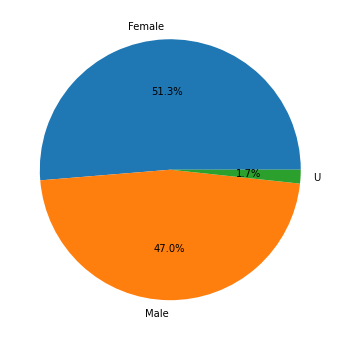

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%1.1f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

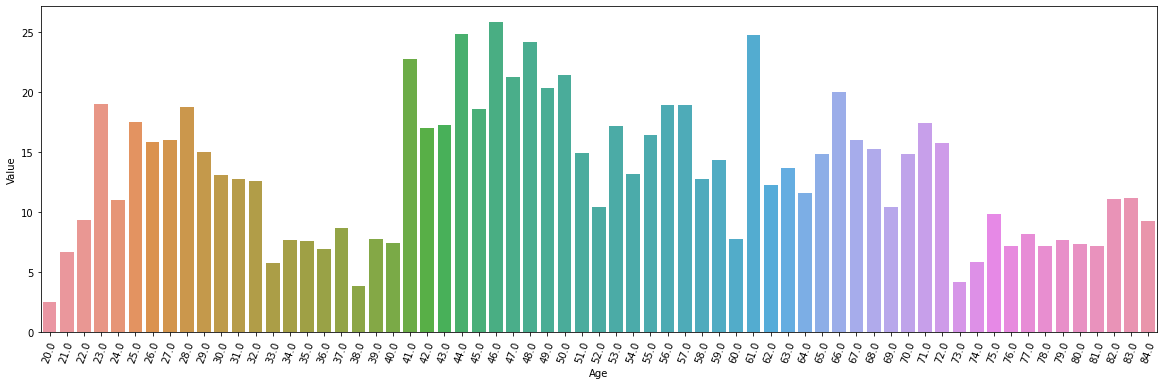

In [ ]:
import seaborn as sb
plt.figure(figsize=(20,6))
sb.barplot(x=df.Value.groupby(df.Age).sum().index, y=df.Value.groupby(df.Age).sum())
plt.xticks(rotation=70)

In [ ]:
df_age_value = df[['Value']].groupby(df['Age']).sum()

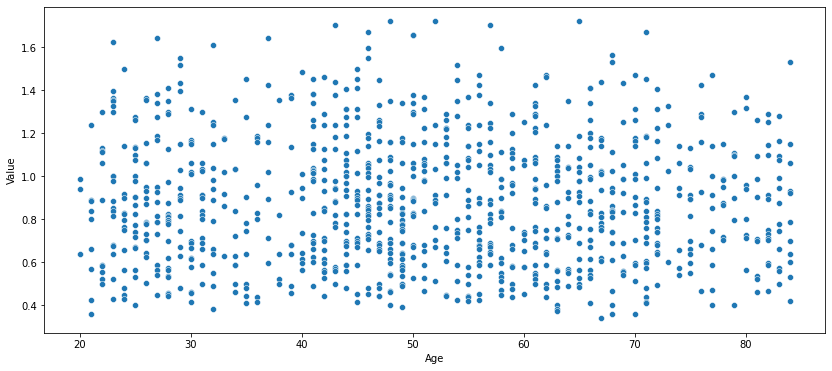

In [ ]:
plt.figure(figsize=(14,6))
sb.scatterplot(data=df, x='Age', y='Value')

### Value by Purchases

In [ ]:
df_purchase_value = df[['Value']].groupby(df['purchases']).sum()

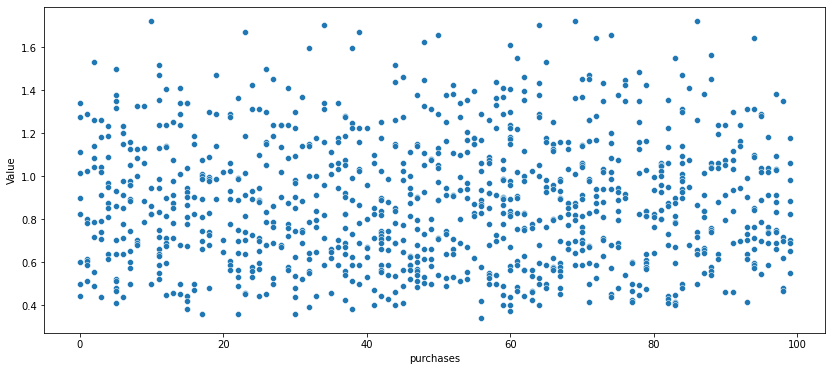

In [ ]:
plt.figure(figsize=(14,6))
sb.scatterplot(data=df, x='purchases', y='Value')

### Value by Rank

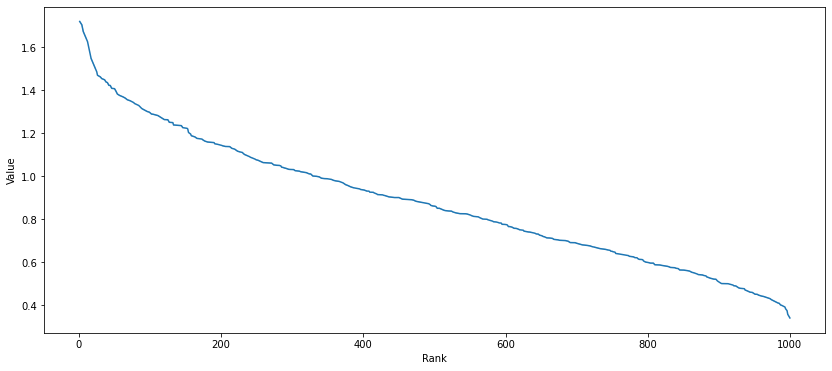

In [ ]:
plt.figure(figsize=(14,6))
sb.lineplot(data=df, x='Rank', y='Value')

### Value by Job_title

In [ ]:
df.columns

Index(['gender', 'purchases', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'Rank', 'Value'],
      dtype='object', name=0)

In [ ]:
df_jobtitle_value = df[['Value']].groupby(df['job_title']).sum()
jobtitle_value = df_jobtitle_value.sort_values('Value', ascending=False).head(15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

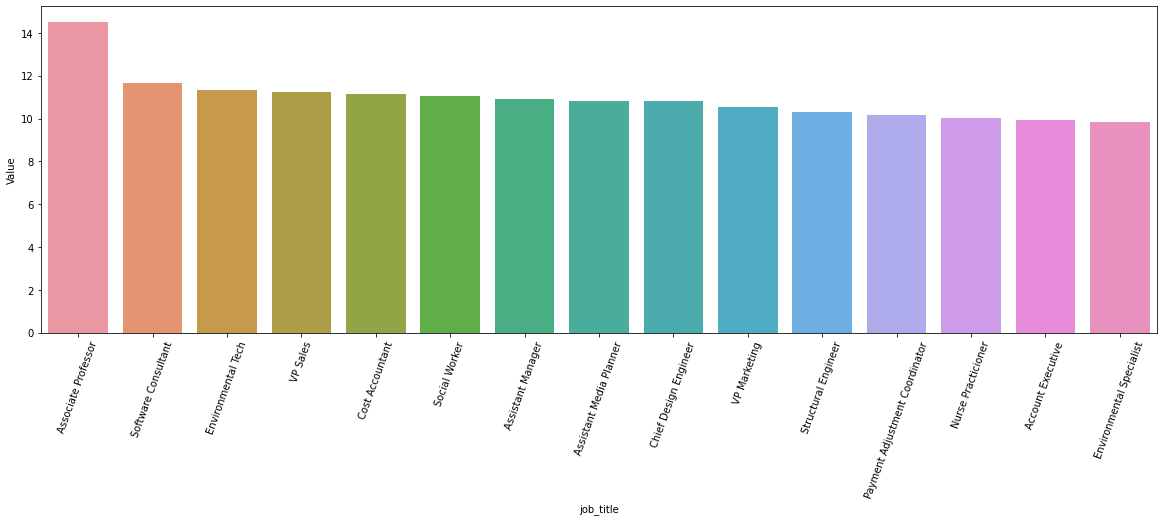

In [ ]:
plt.figure(figsize=(20,6))
sb.barplot(data=jobtitle_value, x=jobtitle_value.index, y=jobtitle_value.Value)
plt.xticks(rotation=70)

### Value by job_industry_category

In [ ]:
df_cat = df[['Value','job_industry_category']].groupby(df['job_industry_category']).sum()
df_cat_val = df_cat.sort_values('Value', ascending=False)
df_cat_val

,Value
job_industry_category,
Financial Services,178.080031
Manufacturing,177.057344
Health,128.841156
Retail,71.324469
Property,58.273656
IT,43.035219
Entertainment,31.867156
Argiculture,23.777406
Telecommunications,21.058062


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

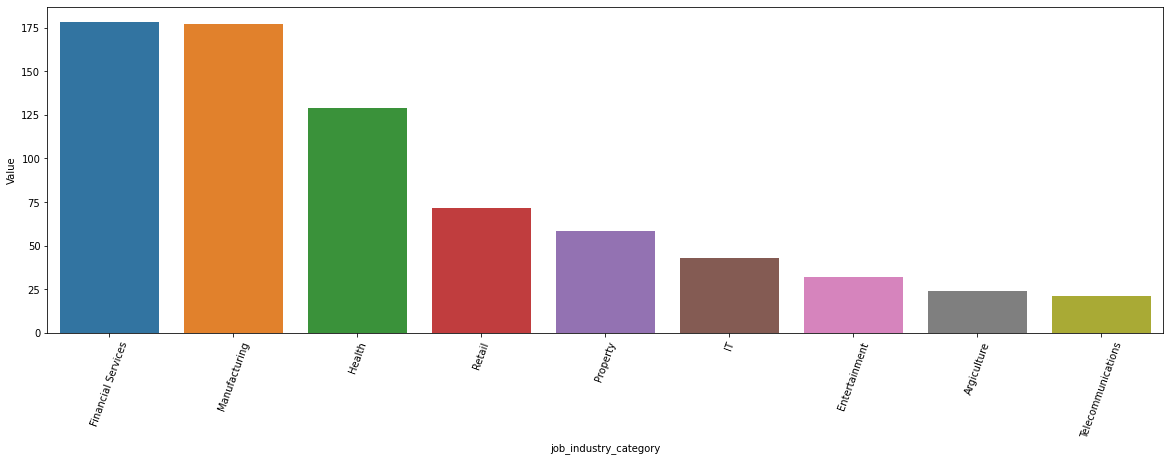

In [ ]:
plt.figure(figsize=(20,6))
ax = sb.barplot(x=df_cat_val.index, y=df_cat_val.Value)
plt.xticks(rotation=70)